## Download and description of the dataset, initial analysis

For this project, I have selected a dataset containing information on the most streamed songs on Spotify in 2024. [The link to the dataset on the Kaggle platform](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024) . The dataset is preloaded as songs.tsv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("songs.csv", encoding = 'unicode_escape')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


**Dataset description**: The dataset contains information on 4,600 of the most streamed songs on Spotify in 2024. Each row in the table represents a song, with the track title listed in the first column ('Track'). For each track, the following data is provided: album name, artist name, release date, International Standard Recording Code (ISRC), an 'All Time Rank' score (ranging from 1 to 900), a 'Track Score' (ranging from 19.4 to 725.4), numerical metrics for streams, playlist additions, and likes across various platforms, as well as a track explicit content indicator ('Explicit') taking values of 0 or 1.

In [2]:
num_rows = df.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 4600


In [ ]:
print(df.count())

Track                         4600
Album Name                    4600
Artist                        4595
Release Date                  4600
ISRC                          4600
All Time Rank                 4600
Track Score                   4600
Spotify Streams               4487
Spotify Playlist Count        4530
Spotify Playlist Reach        4528
Spotify Popularity            3796
YouTube Views                 4292
YouTube Likes                 4285
TikTok Posts                  3427
TikTok Likes                  3620
TikTok Views                  3619
YouTube Playlist Reach        3591
Apple Music Playlist Count    4039
AirPlay Spins                 4102
SiriusXM Spins                2477
Deezer Playlist Count         3679
Deezer Playlist Reach         3672
Amazon Playlist Count         3545
Pandora Streams               3494
Pandora Track Stations        3332
Soundcloud Streams            1267
Shazam Counts                 4023
Explicit Track                4600
dtype: int64


In [3]:
max_rank = df['All Time Rank'].max()
min_rank = df['All Time Rank'].min()
print(f'The maximum value of All Time Rank: {max_rank}, the minimum value of All Time Rank: {min_rank}')

The maximum value of All Time Rank: 999, the minimum value of All Time Rank: 1


In [4]:
max_score = df['Track Score'].max()
min_score = df['Track Score'].min()
print(f'the maximum score: {max_score}, the minimum score: {min_score}')

the maximum score: 725.4, the minimum score: 19.4


The following line of code removes the empty column "TIDAL Popularity".

In [5]:
df = df.drop("TIDAL Popularity", axis=1)
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track'],
      dtype='object')

The columns are delimited by commas. The original dataset contains numerical values where digits are also separated by commas (e.g., as thousand separators). To ensure correct processing of this data, we will remove the commas within these numerical values.

In [6]:
keywords = ['YouTube', 'Spotify', 'TikTok', 'Spins', 'Counts', 'Streams', 'Playlist', 'Pandora']

for col in df.columns:
    if any(keyword in col for keyword in keywords):
        df[col] = df[col].apply(lambda x: str(x).replace(',', '')).astype(float)
df.head(10)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,6.706654e+08,105892.0,175421034.0,...,522042.0,4654.0,86.0,17167254.0,152.0,138529362.0,50982.0,9438601.0,4517131.0,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,9.001588e+08,73118.0,201585714.0,...,383478.0,429.0,168.0,48197850.0,154.0,65447476.0,57372.0,NaN,9990302.0,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,6.750792e+08,40094.0,211236940.0,...,17221.0,30.0,87.0,33245595.0,53.0,3372428.0,5762.0,NaN,6063523.0,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,1.653018e+09,1.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.6,9.067657e+07,10400.0,184199419.0,...,3823.0,117.0,78.0,10800098.0,92.0,1005626.0,842.0,3679709.0,666302.0,1


Display summary statistics:

In [ ]:
df.describe()

,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track
count,4600.000000,4.487000e+03,4530.000000,4.528000e+03,3796.000000,4.292000e+03,4.285000e+03,3.427000e+03,3.620000e+03,3.619000e+03,3.591000e+03,4039.00000,3679.000000,3545.000000,4600.000000
mean,41.844043,4.473873e+08,59390.829801,2.334682e+07,63.501581,4.027967e+08,2.930049e+06,9.443076e+05,1.126375e+08,1.161158e+09,3.439601e+08,54.60312,32.310954,25.348942,0.358913
std,38.543766,5.384439e+08,71131.406625,2.968717e+07,16.186438,7.019000e+08,4.593640e+06,2.442080e+06,5.498123e+08,5.881584e+09,6.704811e+08,71.61227,54.274538,25.989826,0.479734
min,19.400000,1.071000e+03,1.000000,1.000000e+00,1.000000,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,1.900000e+01,1.000000e+00,1.00000,1.000000,1.000000,0.000000
25%,23.300000,7.038630e+07,6718.000000,4.791612e+06,61.000000,4.073032e+07,4.095490e+05,3.818650e+04,5.814876e+06,5.902786e+07,1.171869e+07,10.00000,5.000000,8.000000,0.000000
50%,29.900000,2.398507e+08,32312.500000,1.325948e+07,67.000000,1.482696e+08,1.257935e+06,1.822000e+05,2.653441e+07,2.659172e+08,9.814272e+07,28.00000,15.000000,17.000000,0.000000
75%,44.425000,6.283638e+08,86038.750000,2.966069e+07,73.000000,4.647882e+08,3.573193e+06,7.948775e+05,9.328418e+07,9.134169e+08,3.114059e+08,70.00000,37.000000,34.000000,1.000000
max,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,2.332323e+11,7.289707e+09,859.00000,632.000000,210.000000,1.000000


In [ ]:
df.info()

Check the distribution of songs across release years

Text(0, 0.5, 'Song count')

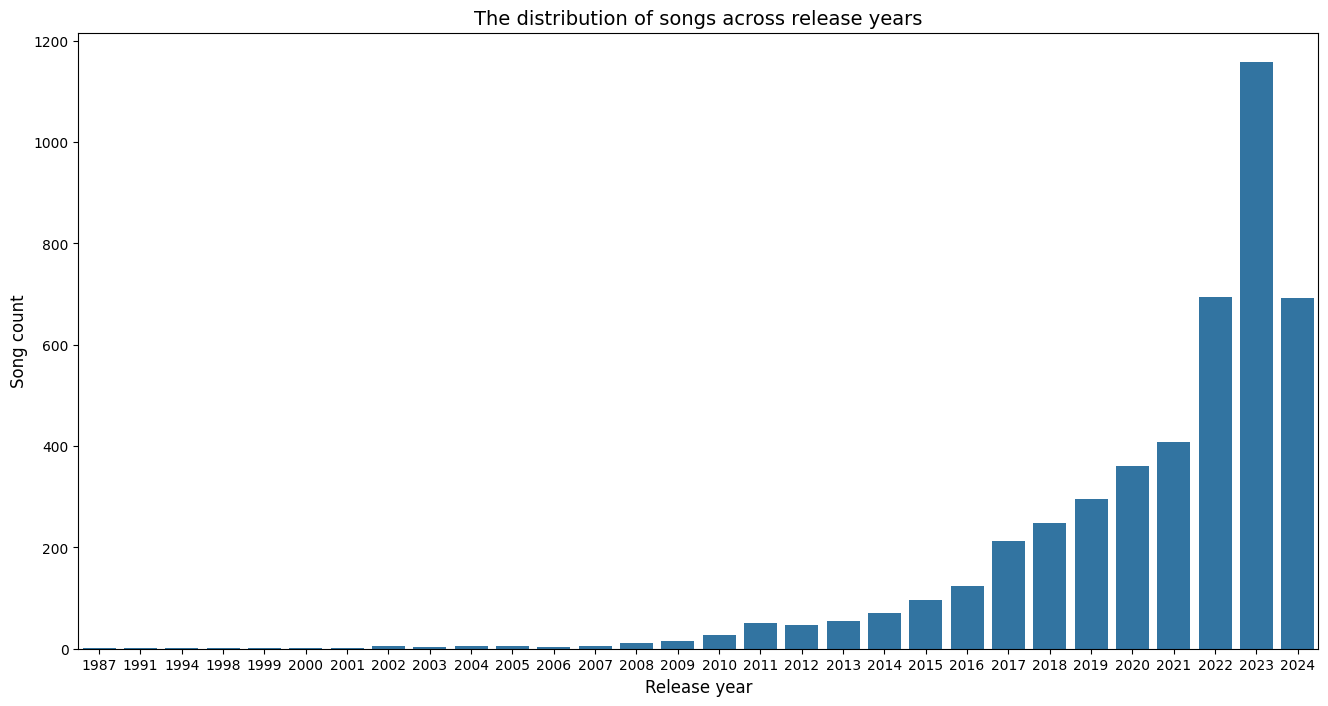

In [7]:
plt.figure(figsize = (16,8))
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Releases in Year'] = df['Release Date'].dt.year
tracks_per_year = df['Releases in Year'].value_counts().sort_index()
sns.barplot(x = tracks_per_year.index.astype(int), y = tracks_per_year.values)

plt.title('The distribution of songs across release years', fontsize=14)
plt.xlabel('Release year', fontsize=12)
plt.ylabel('Song count', fontsize=12)

The maximum number of songs was released in 2023. Identify the release month of the most recent song (2024):

In [8]:
songs_2024 = df[df['Releases in Year'] == 2024]
last_release_date_2024 = songs_2024['Release Date'].max()

print(f"The release month of the most recent song (2024): {last_release_date_2024}")

The release month of the most recent song (2024): 2024-06-14 00:00:00


The most recent song in the dataset was released on June 14, 2024. However, many highly-streamed tracks from later in 2024 are not included. This suggests the dataset captures trends primarily from the first half of 2024, which explains why 2023 songs are more prevalent than 2024 releases. (As a regular Spotify listener familiar with international releases, I can confirm this pattern.)

Examine dataset for categorical columns:

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Track', 'Album Name', 'Artist', 'ISRC', 'All Time Rank'], dtype='object')

## Visualisation of songs distribution by track score and explicit content indicator

'Track Score' column contains song ratings. Check min/max values:


In [9]:
max_score = df['Track Score'].max()
min_score = df['Track Score'].min()
print(f'The maximum score: {max_score}, the minimum score: {min_score}')

The maximum score: 725.4, the minimum score: 19.4


Create categorical variable 'Score Categories' with values 'low', 'medium', 'high'.

In [10]:
# Scores < 250: 'low'
# Scores 250-500: 'medium'
# Scores >= 500: 'high'

df['Score Categories'] = pd.cut(
    df['Track Score'],
    bins=[0, 250, 500, float('inf')],
    labels=['low', 'medium', 'high'],
    right=True
)

In [ ]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Score Categories
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0,high
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1,high
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0,high
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,0,medium
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1,medium


'Explicit Track' is a categorical variable with values 1 and 0.
1 = tracks flagged as Explicit (contains profanity, offensive language, violence, or explicit sexual content)
0 = tracks not flagged (child-friendly content)

Create a pivot table showing song count by Score Categories and Explicit Track status.

In [11]:
table = pd.pivot_table(
    df,
    index = 'Explicit Track',
    columns = 'Score Categories',
    values = 'Track',
    aggfunc = 'count',
    fill_value = 0
)

table

/tmp/ipython-input-2568168872.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = pd.pivot_table(


Score Categories,low,medium,high
Explicit Track,,,
0,2936,11,2
1,1634,16,1


In [12]:
#Mann–Whitney U test
from scipy import stats
df_cl = df.copy()
#df_cl['Score Categories'] = pd.to_numeric(df['Score Categories'], errors='coerce').dropna()
#df_cl['Explicit Track'] = pd.to_numeric(df['Explicit Track'], errors='coerce').dropna()
statistic, p_value = stats.mannwhitneyu(df['Track Score'], df['Explicit Track'])
print(f"statistic: {statistic}")
print(f"p_value: {p_value}")

statistic: 21160000.0
p_value: 0.0


A small p-value (p < 0.05) in the Mann-Whitney U test indicates a correlation between the 'Explicit' track label and its score.

In [14]:
table = pd.DataFrame({
    'Score Categories': ['low', 'low', 'medium', 'medium', 'high', 'high'],
    'Explicit Track': [0, 1, 0, 1, 0, 1],
    'Count': [2936, 1634, 11, 16, 2, 1]
})
df.head(10)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Releases in Year,Score Categories
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0,2024,high
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1,2024,high
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0,2024,high
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,0,2023,medium
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1,2024,medium
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,USAT22311371,6,410.1,6.706654e+08,105892.0,175421034.0,...,86.0,17167254.0,152.0,138529362.0,50982.0,9438601.0,4517131.0,1,2023,medium
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016,7,407.2,9.001588e+08,73118.0,201585714.0,...,168.0,48197850.0,154.0,65447476.0,57372.0,NaN,9990302.0,0,2024,medium
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,QZL382406049,8,375.8,6.750792e+08,40094.0,211236940.0,...,87.0,33245595.0,53.0,3372428.0,5762.0,NaN,6063523.0,1,2024,medium
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,2024-06-09,TCJPA2463708,9,355.7,1.653018e+09,1.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2024,medium
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,USSM12404354,10,330.6,9.067657e+07,10400.0,184199419.0,...,78.0,10800098.0,92.0,1005626.0,842.0,3679709.0,666302.0,1,2024,medium


The table suggests more child-friendly songs than explicit ones, but both groups show similar score distributions. Visualize with a bar plot:

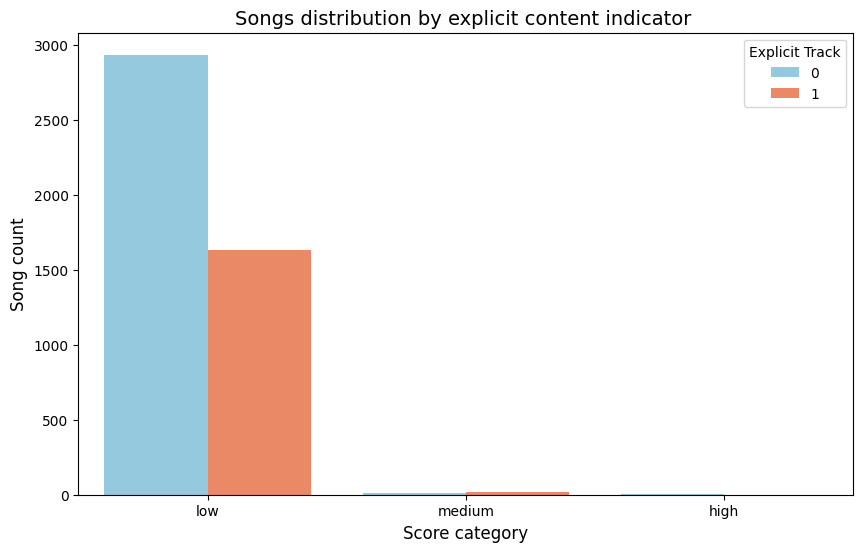

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=table,
    x='Score Categories',
    y='Count',
    hue='Explicit Track',
    palette={0: 'skyblue', 1: 'coral'},
)

plt.title('Songs distribution by explicit content indicator ', fontsize=14)
plt.xlabel('Score category', fontsize=12)
plt.ylabel('Song count', fontsize=12)
plt.show()

## Visualisation of songs distribution by release year

Calculate mean track score for each release year

In [17]:
df_scorebyyear = df.groupby("Releases in Year")["Track Score"].mean()
print(df_scorebyyear)

Releases in Year
1987    21.500000
1991    19.600000
1994    31.500000
1998    20.800000
1999    22.200000
2000    30.400000
2001    20.100000
2002    26.060000
2003    23.766667
2004    24.240000
2005    27.140000
2006    22.300000
2007    23.860000
2008    23.854545
2009    26.000000
2010    31.425926
2011    31.800000
2012    32.197872
2013    31.674545
2014    31.678571
2015    37.988542
2016    37.828455
2017    37.949765
2018    36.977510
2019    39.380405
2020    38.042222
2021    38.144118
2022    41.693228
2023    43.264594
2024    54.120058
Name: Track Score, dtype: float64


Visualisation with lineplot

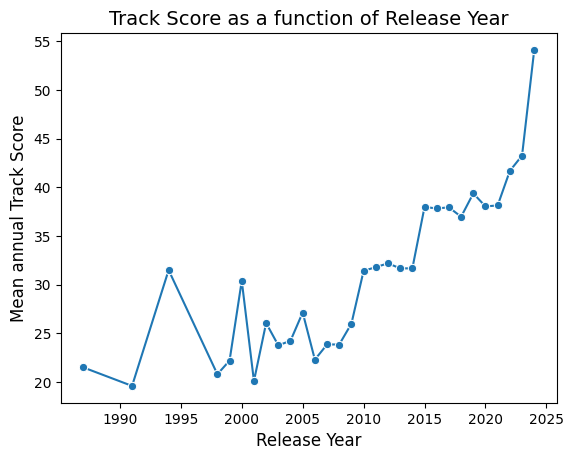

In [18]:
df_scorebyyear = df_scorebyyear.reset_index()
sns.lineplot(
    data=df_scorebyyear,
    x='Releases in Year',
    y='Track Score',
    marker='o')

plt.title('Track Score as a function of Release Year', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Mean annual Track Score', fontsize=12)
plt.show()

A positive trend in scores is observed in recent years.

# Correlation Analysis: Spearman Heatmap

Text(0.5, 1.0, 'cluster-heatmap for Spearman correlations between features')

<Figure size 1000x600 with 0 Axes>

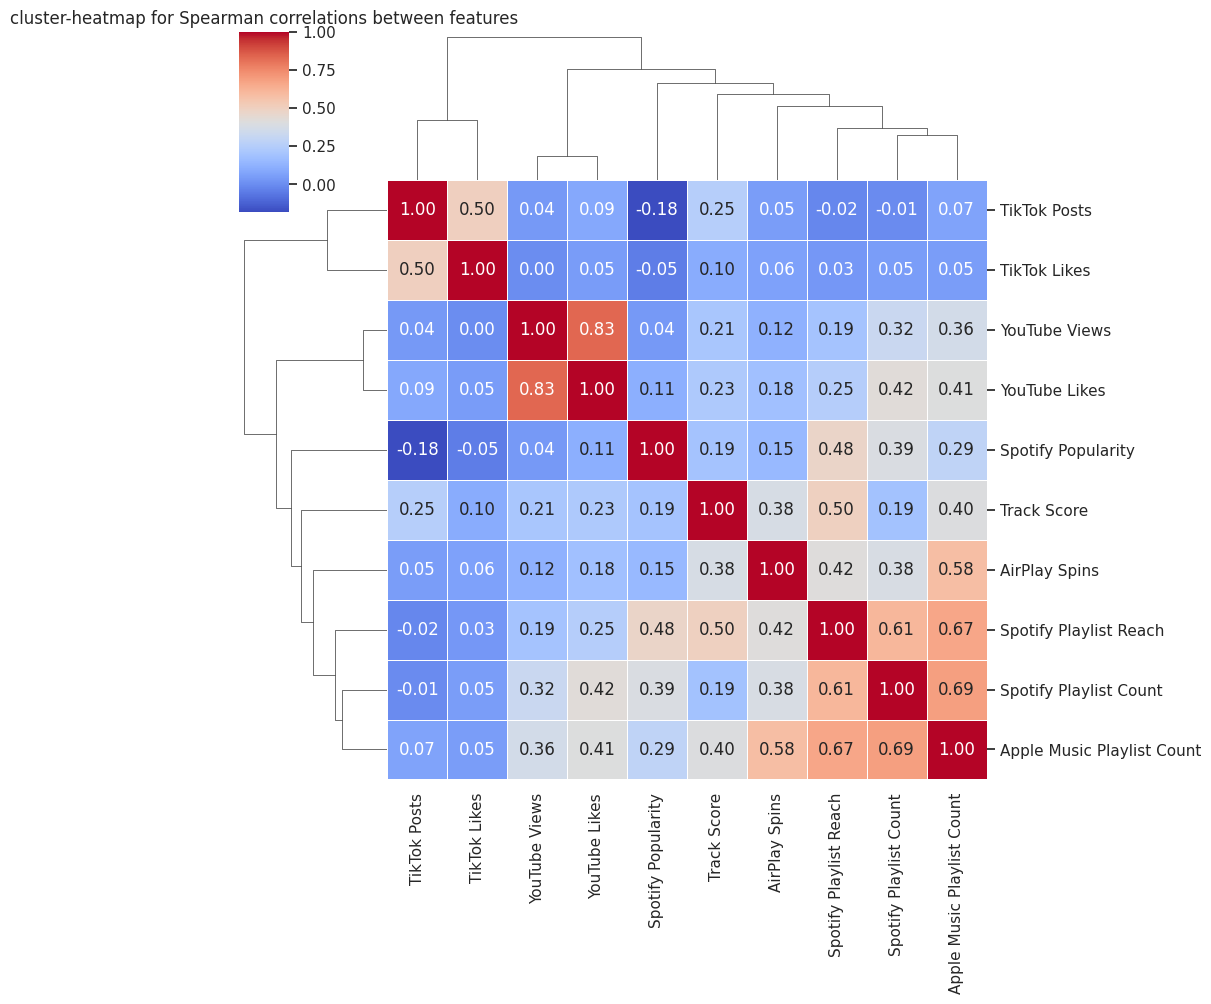

In [19]:
numeric_columns = ['Track Score', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'AirPlay Spins', 'Apple Music Playlist Count']
corr_matrix = df[numeric_columns].corr()
sns.set(style="white")
plt.figure(figsize=(10, 6))
sns.clustermap(corr_matrix, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".2f")
plt.title('cluster-heatmap for Spearman correlations between features')

## Key Correlation Findings

### 1. Platform-Specific Patterns
- **TikTok shows weak correlation** with other platforms, indicating unique engagement dynamics.
- **YouTube demonstrates strong internal correlation** between views and likes (ρ = 0.83).

### 2. Cross-Platform Relationships  
- **Apple Music exhibits moderate correlations** with multiple platforms:
  - Airplay Spins: ρ = 0.58
  - Spotify Playlist Count: ρ = 0.69
  - Spotify Playlist Reach: ρ = 0.67

### 3. Track Score Correlations
The **Spotify Playlist Reach** shows the strongest correlation with Track Score (ρ = 0.50), followed by **Apple Music Playlist Count**.
This suggests playlist inclusion and audience reach may influence perceived song quality more than other metrics.

# Relationship between Track Score and Spotify Playlist Reach

Both 'Spotify Playlist Reach' and 'Track Score' are discrete variables.
Before assessing the statistical significance of the Spearman correlation coefficient,
we must check for missing values (NaN), infinities (inf), and ensure equal array lengths,
as these issues would invalidate the test.

In [20]:
print("NaN in X:", np.isnan(df['Track Score']).any())
print("Inf in X:", np.isinf(df['Track Score']).any())
print("Inf in Y:", np.isinf(df['Spotify Playlist Reach']).any())
print("NaN in Y:", np.isnan(df['Spotify Playlist Reach']).any())
print("Length of X:", len(df['Track Score']), "Length of Y:", len(df['Spotify Playlist Reach']))

NaN in X: False
Inf in X: False
Inf in Y: False
NaN in Y: True
Length of X: 4600 Length of Y: 4600


In [22]:
df_cleaned = df.dropna()

In [23]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df_cleaned['Track Score'], df_cleaned['Spotify Playlist Reach'])
print(f"Spearman's rank correlation coefficient: {corr:.3f}, p-value: {p_value:.4f}")

Spearman's rank correlation coefficient: 0.489, p-value: 0.0000


The obtained p-value allows us to reject the null hypothesis of no correlation.
We therefore accept the alternative hypothesis that a correlation exists
between Track Score and Spotify Playlist Reach.
This correlation is statistically significant.

We compute Pearson's correlation coefficient to assess how closely
the relationship approximates linearity.

In [24]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df_cleaned['Track Score'], df_cleaned['Spotify Playlist Reach'])
print(f"Pearson's correlation coefficient: {corr:.3f}, p-value: {p_value:.4f}")

Pearson's correlation coefficient: 0.643, p-value: 0.0000


The Pearson coefficient is relatively high with a p-value near zero, allowing us to reject the null hypothesis and conclude a statistically significant
linear correlation between the variables.

Visualize the relationship between Track Score and
log-transformed Spotify Playlist Reach using a scatter plot.

Text(0, 0.5, 'Spotify Playlist Reach')

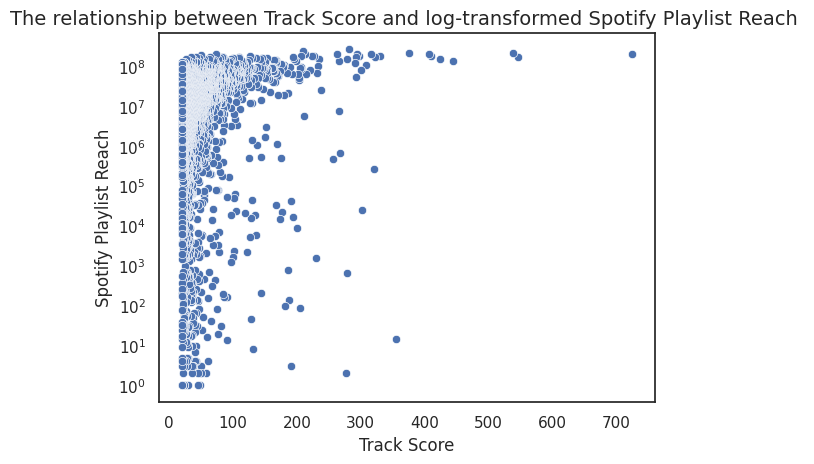

In [25]:
sns.scatterplot(x="Track Score",
            y="Spotify Playlist Reach",
            data=df)

plt.title("Spotify Playlist Reach ~ Track Score")
plt.yscale("log")

plt.title('The relationship between Track Score and log-transformed Spotify Playlist Reach ', fontsize=14)
plt.xlabel('Track Score', fontsize=12)
plt.ylabel('Spotify Playlist Reach', fontsize=12)

Text(0, 0.5, 'Spotify Playlist Reach')

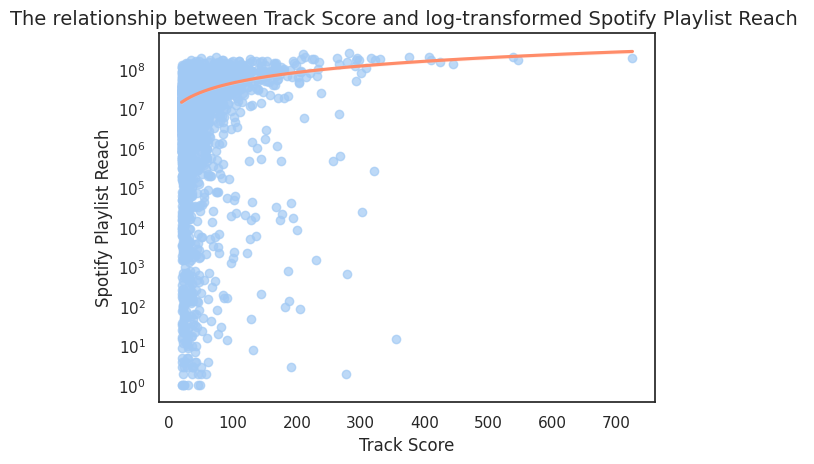

In [26]:
# Fit a regression line
sns.set_palette("pastel")
sns.regplot(x="Track Score",
            y="Spotify Playlist Reach",
            data=df,
            scatter_kws={'alpha': 0.7},
            line_kws={'color': '#ff8c69'} )

plt.title("Spotify Playlist Reach ~ Track Score")
plt.yscale("log")

plt.title('The relationship between Track Score and log-transformed Spotify Playlist Reach ', fontsize=14)
plt.xlabel('Track Score', fontsize=12)
plt.ylabel('Spotify Playlist Reach', fontsize=12)

While no clear overall trend is apparent from the plot,
a pattern emerges for high-scoring tracks (score > 400, n=8):
these consistently show high Spotify Playlist Reach values.

Conversely, low-scoring tracks exhibit heterogeneous playlist reach,
spanning both low and high values without clear pattern.

# Relationship between explicit content indicator and Airplay Spins

Check min/max values of 'Airplay Spins':

In [27]:
max_spins = df['Track Score'].max()
min_spins = df['Track Score'].min()
print(f'The maximum value: {max_spins}, the minimum value: {min_spins}')

The maximum value: 725.4, the minimum value: 19.4


Display top 5 explicit tracks and top 5 non-explicit tracks
based on radio airplay counts.

In [28]:
top_explicit = (
    df[df['Explicit Track'] == 1]
    .sort_values('AirPlay Spins', ascending=False)
    .head(5)
)

top_non_explicit = (
    df[df['Explicit Track'] == 0]
    .sort_values('AirPlay Spins', ascending=False)
    .head(5)
)

print("top 5 explicit tracks:")
print(top_explicit[['Track', 'Artist', 'AirPlay Spins']])
print("\nop 5 non-explicit tracks:")
print(top_non_explicit[['Track', 'Artist', 'AirPlay Spins']])

top 5 explicit tracks:
                                      Track         Artist  AirPlay Spins
26                STAY (with Justin Bieber)  The Kid LAROI      1510151.0
171                         About Damn Time          Lizzo      1024138.0
56   Creepin' (with The Weeknd & 21 Savage)   Metro Boomin       952186.0
42                          I'm Good (Blue)   David Guetta       935190.0
129                  Mood (feat. iann dior)       24kGoldn       931316.0

op 5 non-explicit tracks:
               Track         Artist  AirPlay Spins
19         As It Was   Harry Styles      1777811.0
55   Blinding Lights     The Weeknd      1695240.0
3            Flowers    Miley Cyrus      1474799.0
70        Heat Waves  Glass Animals      1414326.0
158       Bad Habits     Ed Sheeran      1347725.0


## Hypothesis Testing: Radio Airplay vs. Explicit Content
Question: Do explicit tracks receive less radio play?

Method: Box plot visualization + statistical comparison

Data prep: Create categorical indicator column

In [29]:
d = {0:'child-friendly', 1:'explicit'}
df['Explicit Indicator'] = df['Explicit Track'].map(d)
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Releases in Year,Score Categories,Explicit Indicator
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0,2024,high,child-friendly
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1,2024,high,explicit
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0,2024,high,child-friendly
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,0,2023,medium,child-friendly
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1,2024,medium,explicit


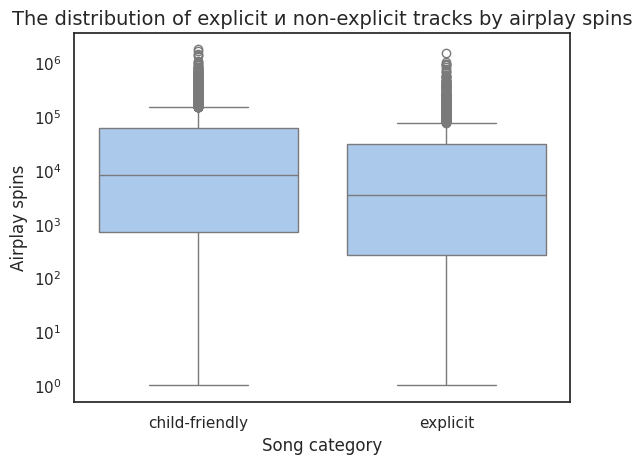

In [30]:
ax = sns.boxplot(x="Explicit Indicator",
               y='AirPlay Spins',
            data=df)
plt.yscale("log")
plt.title('The distribution of explicit и non-explicit tracks by airplay spins', fontsize=14)
plt.xlabel('Song category', fontsize=12)
plt.ylabel('Airplay spins', fontsize=12)
plt.show()

The box plot suggests explicit tracks receive less radio airplay
(lower median, 25th and 75th percentiles compared to child-friendly tracks).

To statistically validate this observation, we apply Fisher's exact test.
First, we categorize Airplay Spins relative to the median:
- 'HighAirPlay' = 1: above median airplay
- 'HighAirPlay' = 0: at or below median airplay

In [31]:
from scipy.stats import fisher_exact

median_spins = df['AirPlay Spins'].median()
df['HighAirPlay'] = (df['AirPlay Spins'] > median_spins).astype(int)

table = pd.crosstab(df['Explicit Track'], df['HighAirPlay'])

odds_ratio, p_value = fisher_exact(table)
print(f"p-value: {p_value:.4f}")
print(table)

p-value: 0.0000
HighAirPlay        0     1
Explicit Track            
0               1558  1391
1                991   660


The statistically significant result (p < 0.05) from Fisher's exact test
provides sufficient evidence to reject the null hypothesis of equal airplay
distribution. We conclude that explicit content is associated with
significantly lower radio airplay frequency.

# SYNTHESIS OF FINDINGS

## Temporal and Compositional Insights
1. **Dataset coverage**: First half of 2024 only → 2023 tracks overrepresented
2. **Score distribution**: Low-scoring tracks (<250) dominate the dataset  
3. **Content rating**: Non-explicit tracks constitute the majority

## Temporal Quality Progression
- **Post-2015 tracks** show **elevated scores** compared to pre-2015 releases
- Suggests either quality improvement or rating inflation over time

## Platform Interrelationships  
- **TikTok engagement operates independently** of other platforms
- **YouTube metrics are internally consistent** (views ↔ likes: ρ = 0.83)
- **Apple Music correlates moderately** with radio play and Spotify metrics
- **Track Score best predicted by** Spotify Playlist Reach (ρ = 0.50)

## Relationship Characteristics  
- **Track Score ↔ Playlist Reach**: Approximately linear (significant Pearson r)
- **Content rating bias**: Radio favors child-friendly over explicit content